In [17]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
#import graphviz
from scipy import misc
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.model_selection import train_test_split

df= pd.read_csv("top300_everyting_encodedandscaled_except_dur.csv")

from sklearn.preprocessing import MinMaxScaler,RobustScaler
scaler=MinMaxScaler()

df['duration_ms'] = scaler.fit_transform(df[['duration_ms']])

df



,Streams,duration_ms,mode,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,...,swedish indie pop,swedish pop,trap latino,trap music,tropical house,turkish hip hop,turkish pop,uk drill,uk hip hop,underground hip hop
0,2993988783,0.383273,0,0.581000,0.825,0.652,0.000000,0.0931,0.831713,0.0802,...,0,0,0,0,0,0,0,0,0,0
1,1829621841,0.372977,1,0.229000,0.694,0.815,0.000000,0.0924,0.781337,0.1200,...,0,0,0,0,0,0,0,0,0,0
2,1460802540,0.371656,1,0.209000,0.660,0.786,0.000000,0.1120,0.762462,0.1700,...,0,0,0,0,0,0,0,0,0,0
3,1386258295,0.411609,0,0.049800,0.617,0.635,0.000014,0.1640,0.673941,0.0317,...,0,0,0,0,0,0,0,0,0,0
4,1311243745,0.263766,0,0.000259,0.904,0.611,0.000020,0.0976,0.670729,0.0888,...,0,0,0,0,0,0,0,0,0,0
5,1190339348,0.356022,1,0.119000,0.640,0.533,0.000000,0.0864,0.681552,0.0706,...,0,0,0,0,0,0,0,0,0,0
6,1136379512,0.326336,1,0.013000,0.853,0.560,0.000000,0.0944,0.753487,0.0406,...,0,0,0,0,0,0,0,0,0,0
7,1119921980,0.330833,0,0.002560,0.771,0.696,0.000010,0.1790,0.696423,0.0755,...,0,0,0,0,0,0,0,0,0,0
8,1115034686,0.407479,1,0.063100,0.735,0.451,0.000013,0.3250,0.603326,0.0585,...,0,0,0,0,0,0,0,0,0,0
9,1112777364,0.336413,0,0.096900,0.774,0.626,0.000031,0.0848,0.776761,0.0432,...,0,0,0,0,0,0,0,0,0,0


In [18]:
'''
df_features=df.iloc[:,[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19] ]
df_features.dropna(inplace=True)
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_features['Mood'])
df_features['Mood']=le.transform(df_features['Mood'])
le = preprocessing.LabelEncoder()
df_features['Genre'] = le.fit_transform(df_features['Genre'].astype(str))
df_features.dropna(inplace=True)
'''

bin=[3000000,18671566,50176627,3000000000]
#use pd.cut function can attribute the values into its specific bins
target= pd.cut(df['Streams'],bin,labels=["Middle","Popular", "Very Popular"])
X_train, X_test, y_train, y_test = train_test_split(df, target, test_size=0.2)

In [20]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import seaborn as sn
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')



0.6868512110726643
accuracy score for y_test: 0.68
Confusion matrix, without normalization
[[315   0   0]
 [ 59   0   0]
 [ 89   0   0]]
Normalized confusion matrix
[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


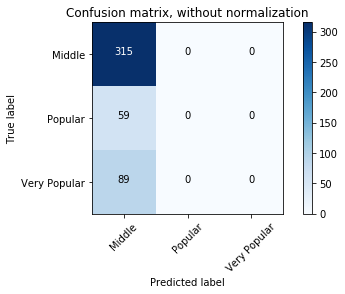

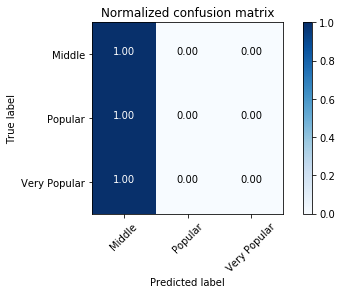

In [22]:
from sklearn import metrics
from sklearn import svm

model = svm.SVC()

# SVM regularization parameter
C = 1
rbf_svc = svm.SVC(kernel='rbf', gamma=0.1, C=C).fit(X_train, y_train)


# Fit the model
model.fit(X_train,y_train)


# Get predictions
predicted = model.predict(X_test)
expected = y_test
# Compare results
print (metrics.accuracy_score(expected,predicted))

def train_and_predict(model, features, target):
    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print("accuracy score for y_test: %.2f" % accuracy_score(y_test, y_pred))
    #print ('Classification Report :')
    #print(classification_report(y_test,y_pred))
    #print ('Confusion Matrix :')
    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)
    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Middle","Popular", "Very Popular"],
                      title='Confusion matrix, without normalization')

    # Plot normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=["Middle","Popular", "Very Popular"], normalize=True,
                      title='Normalized confusion matrix')

    plt.show()
    
train_and_predict(rbf_svc,X_train,y_train)